In [475]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

from scipy.stats import zscore
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [476]:
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# User Input Fields
train_input_file = "./Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv"
train_labels_file = "./Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv"
test_input_file = "./Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv"
numerical_preprocessing = "StandardScaler"
categorical_preprocessing = "OneHotEncoder"
model_type = ""
test_prediction_output_file = ""


# Setup fields 
train_pct = 0.8

In [477]:
train_values = pd.read_csv(train_input_file)
train_labels = pd.read_csv(train_labels_file)

test_values = pd.read_csv(test_input_file)

numeric_cols = train_values.select_dtypes(include=["int64", "float64"], exclude=["object"]).drop(columns=["id"]).columns
categoric_cols = train_values.select_dtypes(include=["object"], exclude=["int64", "float64"]).columns

display(train_labels)
display(train_values)
display(test_values)
# Label is 'status_group'

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [478]:
# Merging the training values and labels into one dataframe
# train_data = pd.merge(train_values, train_labels, on ='id')
# display(train_data)

In [479]:
# ESTO ES DE LAS SOLUCIONES DE LAB 1

# number of training samples is the number of rows of train_values
n_train_samples = len(train_values.index) 
print(f"#training samples: {n_train_samples}")
print("Are #samples and #labels in training set equal?" , n_train_samples == len(train_labels))

# number of test samples is the number of rows of test_competition_input
n_test_samples = len(test_values.index)
print(f"#test samples: {n_test_samples}")

# number of input features is the number of columns of train_values
input_features = train_values.columns
n_features = len(input_features)
print(f"\n#features: {n_features}")
print(input_features)

# the number of output classes is the number of unique status_group values in train_labels_file
output_classes = train_labels["status_group"].unique()
print(f"\n#output classes: {len(output_classes)}")
print(output_classes)

# 
print("\n#training samples per output class:")
print(train_labels["status_group"].value_counts())

#training samples: 59400
Are #samples and #labels in training set equal? True
#test samples: 14850

#features: 40
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

#output classes: 3
['functional' 'non functional' 'functional needs repair']

#training samples per output class:
status_group
functional                 32259
non functional             22824


In [480]:
#train_values.head()
#train_values.columns

train_values.describe(include = "all")

# train_values.shape


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400.000000,59400.000000,59400,55763,59400.000000,55745,59400.000000,5.940000e+04,59398,59400.000000,59400,59029,59400,59400.000000,59400.000000,59400,59400,59400.000000,56066,59400,55522,30590,56344,59400.000000,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1896,NaN,2145,NaN,NaN,37399,NaN,9,19287,21,NaN,NaN,125,2092,NaN,2,1,11,2695,2,NaN,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,Lake Victoria,Madukani,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd,VWC,K,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,10248,508,5294,NaN,NaN,2503,307,NaN,51011,59400,36793,682,38852,NaN,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,NaN,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN,NaN,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,NaN,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN,NaN,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,NaN,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [481]:
train_values.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [482]:
# Find NaN values for each of the columns
for name, values in train_values.items():
    nan_count = train_values[name].isna().sum()
    print(name + ": " + str(nan_count))


#Did not find any Nan values in numerical features, only in categorical features 
# All missing values are in categorical features, so we can handle the  
# missing values as an additional category.

id: 0
amount_tsh: 0
date_recorded: 0
funder: 3637
gps_height: 0
installer: 3655
longitude: 0
latitude: 0
wpt_name: 2
num_private: 0
basin: 0
subvillage: 371
region: 0
region_code: 0
district_code: 0
lga: 0
ward: 0
population: 0
public_meeting: 3334
recorded_by: 0
scheme_management: 3878
scheme_name: 28810
permit: 3056
construction_year: 0
extraction_type: 0
extraction_type_group: 0
extraction_type_class: 0
management: 0
management_group: 0
payment: 0
payment_type: 0
water_quality: 0
quality_group: 0
quantity: 0
quantity_group: 0
source: 0
source_type: 0
source_class: 0
waterpoint_type: 0
waterpoint_type_group: 0


In [483]:
# For each column find the possible values when categorical 
train_values.value_counts(subset="scheme_management", dropna=False)

scheme_management
VWC                 36793
WUG                  5206
NaN                  3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,0.0,0,35.861315,-6.378573,0,1,4,0,0


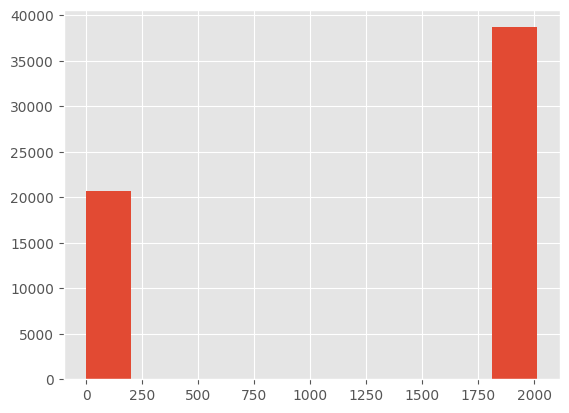

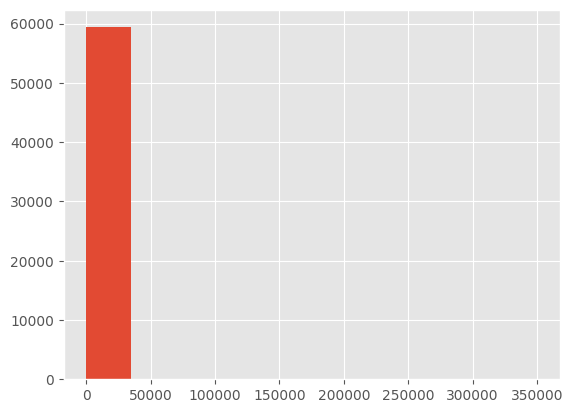

In [484]:
# Plot histograms for the numeric features to detect which ones have missing data 

# Identify features that are numerical
df_num = train_values.select_dtypes(include=["float64", "int64"], exclude=["object"]).drop(columns=["id"])
display(df_num)



# Construction year = 0 means missing data
feature = "construction_year"
vals = df_num[feature].values # this line takes all values of construction_year column, and put them into a 1-d array
plt.hist(vals) # show a histogram of the values
plt.show()




# TODO Might need to handle some outlier data
# TODO Plot the rest of the numeric features using a loop 
feature = "amount_tsh"
plt.hist(df_num[feature])
plt.show()

# for f in df_num:
#     print(f)
#     plt.hist(df_num[f])
#     plt.show()

# Assumming the negative values for gps_height are correct as we are dealing with wells 
    
    

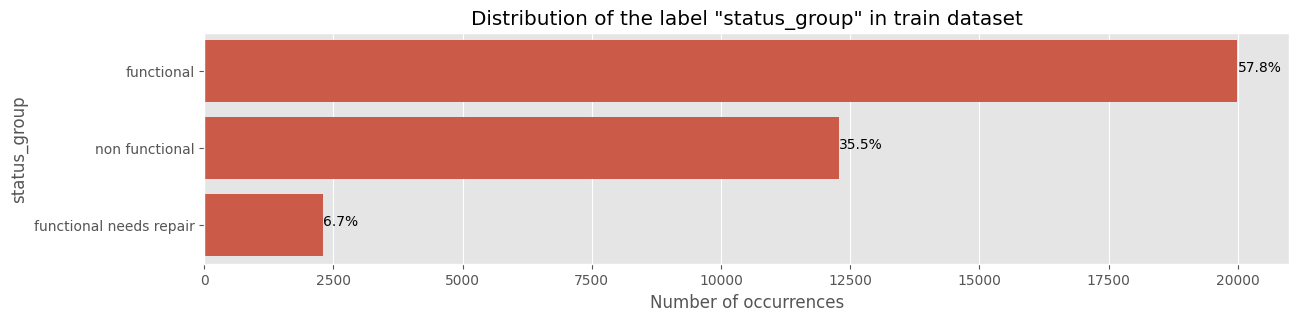

In [493]:
plt.figure(figsize=(14,3))
ax = sns.countplot(y="status_group", data=train_labels)
plt.title('Distribution of the label "status_group" in train dataset')
plt.xlabel('Number of occurrences')
total = len(train_labels['status_group'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

In [485]:
# Preprocessing

# Datetime Handling
# 'date_recorded' column is currently a string
    # Extract features like day month year
    # Two approaches
    # - calculate the time difference from a reference date
    # - assign a value ????
    # then i would have to scale it
# TODO HANDLE THE 0 DATA WHICH IS MISSING DATA BEFORE CALCULATING THE TIME DIFFERENCE FROM THE MINIMUM DATE THIS APPROACH DOESNT MAKE SENSE



# # this feature is read as strings by the dataframe. Therefore, by default, they'll be treated as categorical features. But that doesn't really make sense.
# print(train_values.select_dtypes(include=["object"], exclude=["int64", "float64"]).columns)

# Converting 'date_recorded' into a numerical feature: the number of days since the first recorded date in the dataset.
train_values["date_recorded"] = pd.to_datetime(train_values.date_recorded, format="%Y-%m-%d")

train_values.describe(include = "all")


# find the first recorded date in the training set
first_recorded_date = train_values["date_recorded"].min()
# substract date_recorded column with that first recorded date 
new_dates = train_values["date_recorded"] - first_recorded_date
# convert the new values to the number of days
n_days_since_first = [x.days for x in new_dates]
# replace date_recorded column with the new feature
train_values["date_recorded"] = n_days_since_first
# check data type of the new column (to ensure it's now numeric)
print(train_values["date_recorded"].dtype)

#Re-calculate the numeric and categorical columns 
numeric_cols = train_values.select_dtypes(include=["int64", "float64"], exclude=["object"]).drop(columns=["id"]).columns
categoric_cols = train_values.select_dtypes(include=["object"], exclude=["int64", "float64"]).columns



int64


In [486]:
# Outlier Handling in Numeric Fields 
# Through imputation for now TODO

# TODO here i am using imputation figure out if that is the best approach 
# Remove every row where construction year is 0 -> this means this data is missing 
mask = train_values['construction_year'] != 0
print(train_values.shape)
train_values_filt = train_values[mask].reset_index(drop=True)
train_labels_filt = train_labels[mask].reset_index(drop=True)
# TODO clean these two lines up
train_values = train_values_filt
train_labels = train_labels_filt
print(train_values.shape)
print(train_labels.shape)



# Detect Outlier through Z Scores

z_scores = np.abs(train_values[numeric_cols].apply(zscore))
threshold = 3
train_values.describe()
# mask = (np.abs(z_scores) < threshold).all(axis=1)
# non_outlier_values = train_values[mask].reset_index(drop=True)
# non_outlier_labels = train_labels[mask].reset_index(drop=True)
# train_values = non_outlier_values
# train_labels = non_outlier_labels
outliers = (z_scores > threshold).any(axis=1)
print(outliers)
values_clean = train_values[~outliers].reset_index(drop=True)
labels_clean = train_labels[~outliers].reset_index(drop=True)
train_values = values_clean
train_labels = labels_clean

print("New corpus shape after zscore outlier")
print(train_values.shape)
print(train_labels.shape)



(59400, 40)
(38691, 40)
(38691, 2)
0        False
1        False
2        False
3         True
4        False
         ...  
38686    False
38687    False
38688    False
38689    False
38690    False
Length: 38691, dtype: bool
New corpus shape after zscore outlier
(34589, 40)
(34589, 2)


In [487]:
train_values.describe(include = "all")

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,34589.000000,34589.000000,34589.000000,33271,34589.000000,33269,34589.000000,34589.000000,34588,34589.000000,34589,34579,34589,34589.000000,34589.000000,34589,34589,34589.000000,32533,34589,32741,22102,32715,34589.000000,34589,34589,34589,34589,34589,34589,34589,34589,34589,34589,34589,34589,34589,34589,34589,34589
unique,NaN,NaN,NaN,1268,NaN,1382,NaN,NaN,22321,NaN,9,10970,17,NaN,NaN,76,1182,NaN,2,1,11,1793,2,NaN,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,NaN,NaN,NaN,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,Pangani,Shuleni,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd,VWC,Chalinze wate,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,NaN,NaN,5827,NaN,10190,NaN,NaN,2997,NaN,8572,337,4884,NaN,NaN,2466,307,NaN,29869,34589,20199,392,23642,NaN,19075,19075,19075,23115,30061,12205,12205,30335,30335,19942,19942,11914,11914,25076,20213,23570
mean,37127.716153,361.700698,3505.508138,NaN,1078.862644,NaN,35.690284,-5.939246,NaN,0.238949,NaN,NaN,NaN,9.690798,3.367516,NaN,NaN,216.080661,NaN,NaN,NaN,NaN,NaN,1996.836567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21433.062416,1025.679684,348.227762,NaN,588.729978,NaN,2.465485,2.660858,NaN,2.605638,NaN,NaN,NaN,6.593524,3.472530,NaN,NaN,265.277502,NaN,NaN,NaN,NaN,NaN,12.389492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,3003.000000,NaN,-63.000000,NaN,29.607122,-11.649440,NaN,0.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18516.000000,0.000000,3080.000000,NaN,549.000000,NaN,34.611848,-8.110691,NaN,0.000000,NaN,NaN,NaN,4.000000,2.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37147.000000,0.000000,3753.000000,NaN,1216.000000,NaN,36.018703,-5.238757,NaN,0.000000,NaN,NaN,NaN,10.000000,3.000000,NaN,NaN,140.000000,NaN,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55541.000000,200.000000,3788.000000,NaN,1519.000000,NaN,37.478720,-3.510525,NaN,0.000000,NaN,NaN,NaN,15.000000,4.000000,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [488]:
# TODO Numerical Preprocessing
# Handle missing values 
# Handle infrequent values? 



# if numerical_preprocessing == "StandardScaler" :

# elif numerical_preprocessing == "None" :

In [489]:
# Categorical Preprocessing

# Handle missing values 
# Handle infrequent categories

# do any of my features have more than 500 categories? if so might need to select top few 
    
# TODO find values that appear less than 1000 times in the datasetco
# TODO maybe the encoders can handle these two situations



    
# if categorical_preprocessing == "OneHotEncoder":


# elif categorical_preprocessing == "OrdinalEncoder":

# elif categorical_preprocessing == "TargetEncoder":




In [490]:
scaler = StandardScaler(with_mean=True, with_std=True)
encoder = OneHotEncoder(min_frequency= 100, max_categories=100)

# Split the data into train and test sets 
#train_values.set_index('id', inplace=True)
# train_labels.set_index('id', inplace=True)
train_values.drop(columns=["id"], inplace = True)
train_labels.drop(columns=["id"], inplace = True)
X_train, X_val, y_train, y_val = train_test_split(train_values, train_labels, train_size = train_pct)




# Transformer object with scaler and encoder
# preprocessor = ColumnTransformer(
#    transformers = [
#        ('num', scaler, selector(dtype_include=['float64','int64'])),
#        ('cat', encoder, selector(dtype_include='object'))],
#    verbose=True)
preprocessor = ColumnTransformer(
   transformers = [
       ('num', scaler, numeric_cols),
       ('cat', encoder, categoric_cols)],
   verbose=True)

# Apply to the training data 
preprocessor.fit(X_train)
s = preprocessor.named_transformers_['num']
c = preprocessor.named_transformers_['cat']
print(s.feature_names_in_)
print(c.feature_names_in_)
print(s.mean_)

X_train_transformed = preprocessor.transform(X_train)


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.4s
['amount_tsh' 'date_recorded' 'gps_height' 'longitude' 'latitude'
 'num_private' 'region_code' 'district_code' 'population'
 'construction_year']
['funder' 'installer' 'wpt_name' 'basin' 'subvillage' 'region' 'lga'
 'ward' 'public_meeting' 'recorded_by' 'scheme_management' 'scheme_name'
 'permit' 'extraction_type' 'extraction_type_group'
 'extraction_type_class' 'management' 'management_group' 'payment'
 'payment_type' 'water_quality' 'quality_group' 'quantity'
 'quantity_group' 'source' 'source_type' 'source_class' 'waterpoint_type'
 'waterpoint_type_group']
[ 3.60599877e+02  3.50676333e+03  1.07851715e+03  3.56895544e+01
 -5.93006754e+00  2.49213979e-01  9.67774927e+00  3.36359365e+00
  2.15818402e+02  1.99686708e+03]


In [491]:

model = LogisticRegression(max_iter=400)
model.fit(X_train_transformed, y_train.values.ravel())
# model.fit(X_train_transformed, y_train.varavel())


LogisticRegression(max_iter=400)

In [492]:
# calculate classification accuracy of the trained model on the training set
y_train_pred = model.predict(X_train) # make the predictions
acc_train = accuracy_score(y_pred=y_train_pred, y_true=y_train) # calculate the score
print(f"classification accuracy on the training set: {acc_train:.4f}")
# calculate classification accuracy of the trained model on the validation set
X_val_preprocessed = preprocessor.transform(X_val) # first we need to preprocess the input
y_val_pred = model.predict(X_val_preprocessed) # then make the predictions
acc_val = accuracy_score(y_pred=y_val_pred, y_true=y_val) # calculate the score
print(f"classification accuracy on the validation set: {acc_val:.4f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Tasaf'

In [ ]:
# Predict values using the provided test set 
# Output the values to a new file using the given format